## 引入库

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import xlrd
import jieba

In [2]:
data_cn = pd.read_excel('colors.xls')
data_cn.head()

,name,red,green,blue,name_cn
0,parakeet,174,182,87,多嘴人
1,saddle brown,88,52,1,马鞍棕
2,cucumber crush,222,237,215,黄瓜粉碎
3,pool blue,134,194,201,池蓝
4,distance,98,110,130,距离


In [3]:
data_cn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14157 entries, 0 to 14156
Data columns (total 5 columns):
name       14157 non-null object
red        14157 non-null int64
green      14157 non-null int64
blue       14157 non-null int64
name_cn    14157 non-null object
dtypes: int64(3), object(2)
memory usage: 553.1+ KB


In [4]:
def cut_words(x):
    return " ".join(jieba.cut(x, cut_all=True))

In [5]:
names_cn = data_cn['name_cn']

In [6]:
# cutted_names = names_cn.apply(cut_words)
cutted_names = names_cn

In [7]:
maxlen_cn = 10
t_cn = tf.keras.preprocessing.text.Tokenizer(num_words=None, char_level=True)
t_cn.fit_on_texts(cutted_names)
tokenized_cn = t_cn.texts_to_sequences(cutted_names)
padded_names_cn = tf.keras.preprocessing.sequence.pad_sequences(tokenized_cn, maxlen=maxlen_cn, padding='post')

In [8]:
def norm(value):
    return value / 255.0

normalized_values_cn = np.column_stack([norm(data_cn["red"]), norm(data_cn["green"]), norm(data_cn["blue"])])

In [9]:
model_cn = tf.keras.models.Sequential()
model_cn.add(tf.keras.layers.Reshape((1, 10), input_shape=(10,)))
model_cn.add(tf.keras.layers.LSTM(256, return_sequences=True))
model_cn.add(tf.keras.layers.LSTM(128))
model_cn.add(tf.keras.layers.Dense(128, activation='relu'))
model_cn.add(tf.keras.layers.Dense(3, activation='sigmoid'))
model_cn.compile(optimizer=tf.train.AdamOptimizer(0.001), loss='mse')
model_cn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1, 10)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 1, 256)            273408    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 387       
Total params: 487,427
Trainable params: 487,427
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model_cn.fit(padded_names_cn, normalized_values_cn,
                    epochs=40,
                    batch_size=32,
                    validation_split=0.1)

Train on 12741 samples, validate on 1416 samples
Epoch 1/40
12741/12741 [==============================] - 3s 268us/step - loss: 0.0657 - val_loss: 0.0673
Epoch 2/40
12741/12741 [==============================] - 2s 166us/step - loss: 0.0651 - val_loss: 0.0665
Epoch 3/40
12741/12741 [==============================] - 2s 166us/step - loss: 0.0649 - val_loss: 0.0662
Epoch 4/40
12741/12741 [==============================] - 2s 165us/step - loss: 0.0647 - val_loss: 0.0661
Epoch 5/40
12741/12741 [==============================] - 2s 170us/step - loss: 0.0645 - val_loss: 0.0665
Epoch 6/40
12741/12741 [==============================] - 2s 179us/step - loss: 0.0645 - val_loss: 0.0661
Epoch 7/40
12741/12741 [==============================] - 2s 187us/step - loss: 0.0643 - val_loss: 0.0663
Epoch 8/40
12741/12741 [==============================] - 2s 179us/step - loss: 0.0641 - val_loss: 0.0663
Epoch 9/40
12741/12741 [==============================] - 2s 172us/step - loss: 0.0640 - val_loss: 0.06

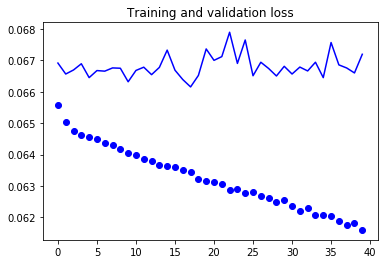

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'bo')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.show()

In [12]:
def predict_cn(name):
    # name = cut_words(name)
    tokenized_cn = t_cn.texts_to_sequences([name])
    padded = tf.keras.preprocessing.sequence.pad_sequences(tokenized_cn, maxlen=10)
    pred = model_cn.predict(np.array(padded))[0]
    r, g, b = scale(pred[0]), scale(pred[1]), scale(pred[2])
    print(name + ',', 'R,G,B:', r,g,b)
    print(pred)
    plot_rgb(pred)

In [13]:
# plots a color image
def plot_rgb(rgb):
    data = [[rgb]]
    plt.figure(figsize=(2,2))
    plt.imshow(data, interpolation='nearest')
    plt.show()
    
def scale(n):
    return int(n * 255)

def predict(name):
    tokenized = t.texts_to_sequences([name])
    padded = tf.keras.preprocessing.sequence.pad_sequences(tokenized, maxlen=maxlen)
    pred = model.predict(np.array(padded))[0]
    r, g, b = scale(pred[0]), scale(pred[1]), scale(pred[2])
    print(name + ',', 'R,G,B:', r,g,b)
    plot_rgb(pred)

绿, R,G,B: 80 199 67
[0.316958   0.7808579  0.26574242]


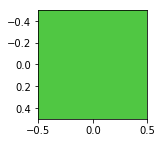

青, R,G,B: 185 150 138
[0.72764176 0.59045655 0.54414105]


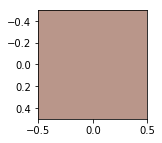

紫, R,G,B: 125 87 121
[0.49233544 0.34473115 0.47457916]


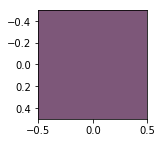

In [19]:
predict_cn("绿")
predict_cn("青")
predict_cn("紫")

粉, R,G,B: 100 89 115
[0.3936223  0.34921488 0.45286214]


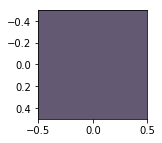

脸, R,G,B: 206 174 140
[0.81122804 0.6846364  0.55183303]


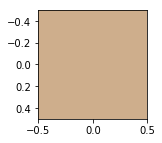

褐, R,G,B: 175 138 137
[0.6871789  0.54202515 0.5382649 ]


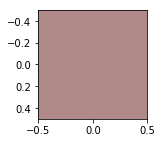

In [21]:
predict_cn("粉")
predict_cn("脸")
predict_cn("褐")